In [ ]:
!pip install catboost matplotlib scikit-learn pandas seaborn

In [ ]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error # Import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.display import display
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
import seaborn as sns

In [ ]:
drive.mount('/content/drive')
file_path = 'change to your xlsx file path'
df = pd.read_excel(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


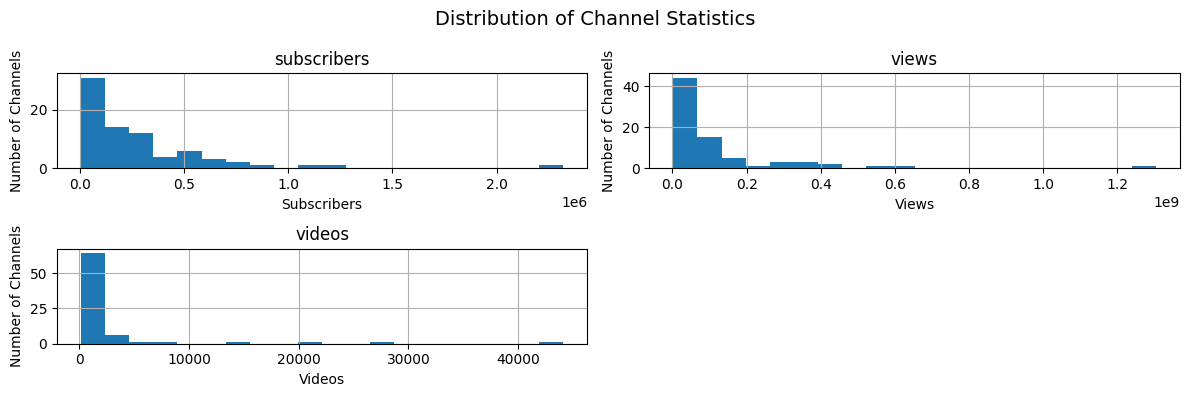

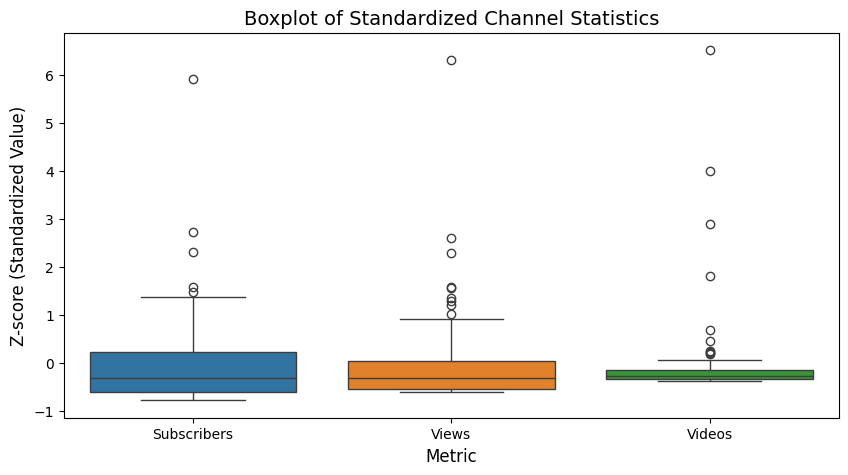

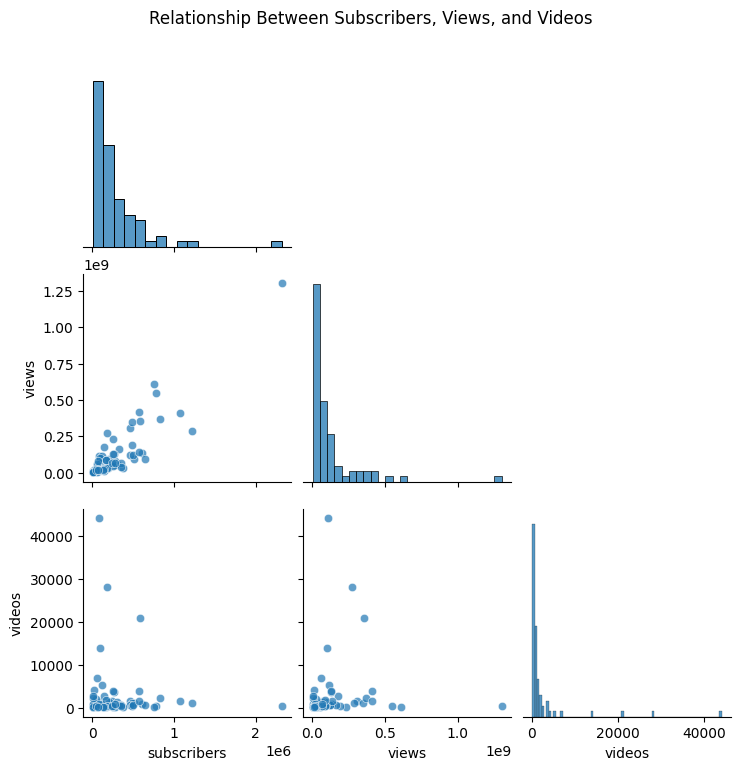

In [ ]:
# 頻道目前整體數值分布
numeric_cols = ['subscribers', 'views', 'videos']
df_current = df[numeric_cols]
df_scaled = df[numeric_cols].copy()

# 標準化
scaler = StandardScaler()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

# 1. 長條圖（目前規模）
df_current.hist(bins=20, figsize=(12, 4))
plt.suptitle("Distribution of Channel Statistics", fontsize=14)

# Add axis labels to each subplot
axes = plt.gcf().get_axes()
labels = ["Subscribers", "Views", "Videos"]

for ax, label in zip(axes, labels):
    ax.set_xlabel(label)
    ax.set_ylabel("Number of Channels")

plt.tight_layout()
plt.show()


# 2. 箱型圖
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_scaled)
plt.title("Boxplot of Standardized Channel Statistics", fontsize=14)
plt.xlabel("Metric", fontsize=12)
plt.ylabel("Z-score (Standardized Value)", fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=["Subscribers", "Views", "Videos"])
plt.show()

# 3.
sns.pairplot(df[numeric_cols], corner=True, plot_kws={'alpha': 0.7})
plt.suptitle("Relationship Between Subscribers, Views, and Videos", y=1.02)
plt.show()


Pearson Correlation Matrix:
             subscribers     views    videos
subscribers     1.000000  0.886468 -0.048691
views           0.886468  1.000000  0.104623
videos         -0.048691  0.104623  1.000000


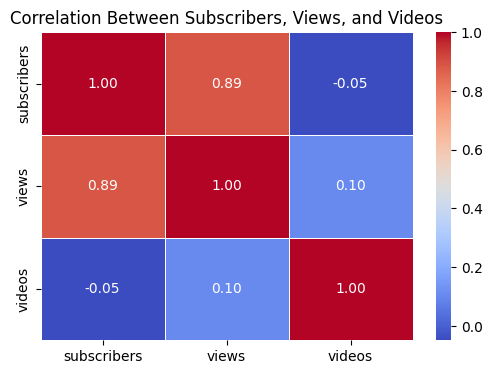

In [ ]:
# 計算皮爾森相關係數矩陣
correlation_matrix = df[numeric_cols].corr(method='pearson')

# 顯示數值
print("Pearson Correlation Matrix:")
print(correlation_matrix)

# 畫熱力圖
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Subscribers, Views, and Videos")
plt.show()
